<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_3_0_7_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

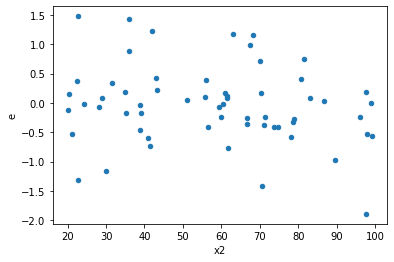

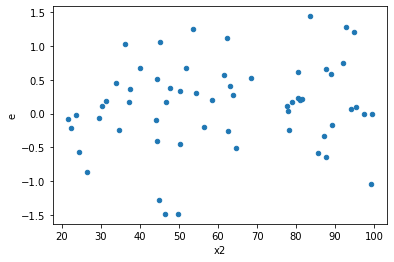

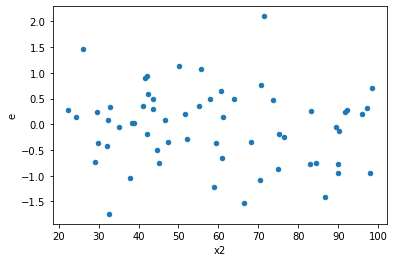

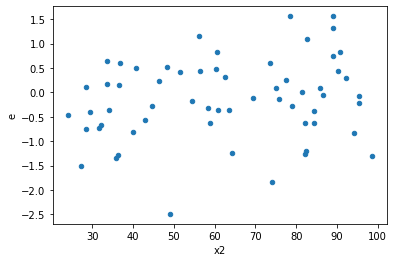

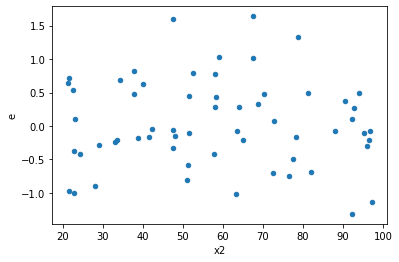

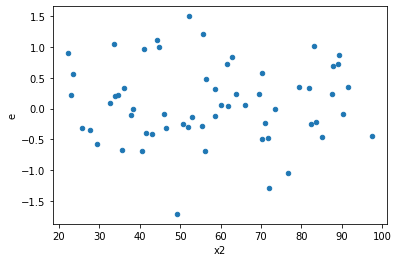

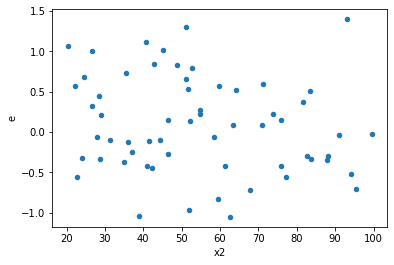

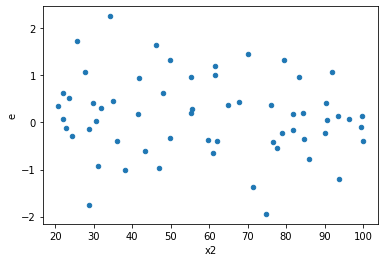

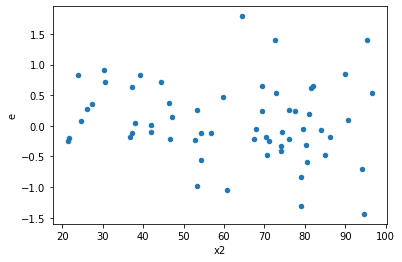

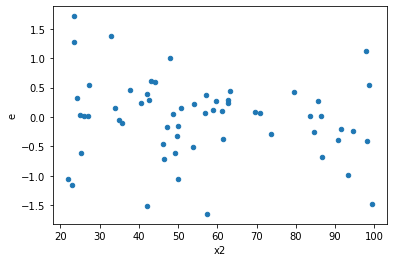

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,30.0,24.0,11.77212146850191,9.990920981302994,0.40593522305179,0.43438786875230406,1.0608666636717958,0.8683760812938321,0.5658119593530839,Reject001=1 : Homoscedasticity
2.0,24.0,30.0,11.024860438582381,18.574415194903807,0.47934175819923397,0.6404970756863382,1.3478204317145752,0.457117078445884,0.771441460777058,Reject001=1 : Homoscedasticity
4.0,28.0,26.0,8.195087282511059,12.542658108527636,0.3035217512041133,0.5017063243411054,1.6482408908390456,0.19789569436505228,0.9010521528174739,Reject001=1 : Homoscedasticity
5.0,28.0,26.0,8.321831329072737,12.902220195141076,0.3082159751508421,0.516088807805643,1.6696683845475888,0.18667437688793864,0.9066628115560307,Reject001=1 : Homoscedasticity
7.0,30.0,24.0,18.844252531232783,16.715187859536844,0.6498018114218201,0.7267472982407324,1.108772278963626,0.780247641002799,0.6098761794986005,Reject001=1 : Homoscedasticity
9.0,27.0,27.0,10.407680583937529,11.6281092899621,0.4002954070745203,0.44723497269085005,1.1172623137481847,0.7753750129840062,0.6123124935079969,Reject001=1 : Homoscedasticity
15.0,26.0,28.0,13.227645749994329,16.564898076581464,0.5291058299997732,0.6135147435770912,1.1628441947893828,0.7018922513220649,0.6490538743389676,Reject001=1 : Homoscedasticity
17.0,27.0,27.0,12.121089551675054,15.547039996589088,0.46619575198750207,0.597963076791888,1.2826437697954793,0.5222075423623294,0.7388962288188353,Reject001=1 : Homoscedasticity
19.0,24.0,30.0,10.573669607198605,13.878879959580752,0.4597247655303741,0.4785820675717501,1.0500710141449432,0.9120587630287771,0.5439706184856115,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,30.0,24.0,11.77212146850191,9.990920981302994,0.40593522305179,0.43438786875230406,1.0608666636717958,1.1316239187061679,Reject001=1 : Homoscedasticity
1.0,25.0,29.0,13.200495799115512,9.3509402113506,0.5500206582964796,0.3339621504053786,0.610670650351839,0.2016140723070654,Reject001=1 : Homoscedasticity
2.0,24.0,30.0,11.024860438582381,18.574415194903807,0.47934175819923397,0.6404970756863382,1.3478204317145752,0.457117078445884,Reject001=1 : Homoscedasticity
3.0,22.0,32.0,16.06922497734324,19.23115240317928,0.7652011893972971,0.620359754941267,0.8227787771860346,0.6028692921711071,Reject001=1 : Homoscedasticity
4.0,28.0,26.0,8.195087282511059,12.542658108527636,0.3035217512041133,0.5017063243411054,1.6482408908390456,0.19789569436505228,Reject001=1 : Homoscedasticity
5.0,28.0,26.0,8.321831329072737,12.902220195141076,0.3082159751508421,0.516088807805643,1.6696683845475888,0.18667437688793864,Reject001=1 : Homoscedasticity
6.0,22.0,32.0,8.448649285327743,9.489846975097397,0.40231663263465445,0.30612409597088375,0.7722263731209394,0.4949824236215667,Reject001=1 : Homoscedasticity
7.0,30.0,24.0,18.844252531232783,16.715187859536844,0.6498018114218201,0.7267472982407324,1.108772278963626,1.219752358997201,Reject001=1 : Homoscedasticity
8.0,26.0,28.0,12.765616742745442,8.966491491753628,0.5106246697098177,0.3320922774723566,0.6522229189202954,0.2700773899349646,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      979
Reject001=0 : Heteroscedasticity     21
Name: Result_test, dtype: int64